In [12]:
import os
os.chdir("C:/Users/pitak/Desktop/DigitalHuman-Speak")
import python.util.TextProcessingUtil as tpu
import speech_recognition as sr
import librosa as bros
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import IPython.display as dp
%matplotlib inline

In [13]:
PATH = "data\Test\dontworry.wav"

In [33]:
data, Fs = bros.load(PATH, sr=1000)

In [35]:
recog = sr.Recognizer()
speech = sr.AudioFile(PATH)
with speech as source:
    audio = recog.listen(source)
text = recog.recognize_google(audio,language='th')
print(text)

ฉันจะพาเธอลอยล่องไปในอวกาศจะมีแต่เธอมีแต่เธอนักไม่ต้องกลัว


In [36]:
syls = tpu.GetSyllables(text=text)
syls

['ฉัน',
 'จะ',
 'พา',
 'เธอ',
 'ลอย',
 'ล่อง',
 'ไป',
 'ใน',
 'อว',
 'กาศ',
 'จะ',
 'มี',
 'แต่',
 'เธอ',
 'มี',
 'แต่',
 'เธอ',
 'นัก',
 'ไม่',
 'ต้อง',
 'กลัว']

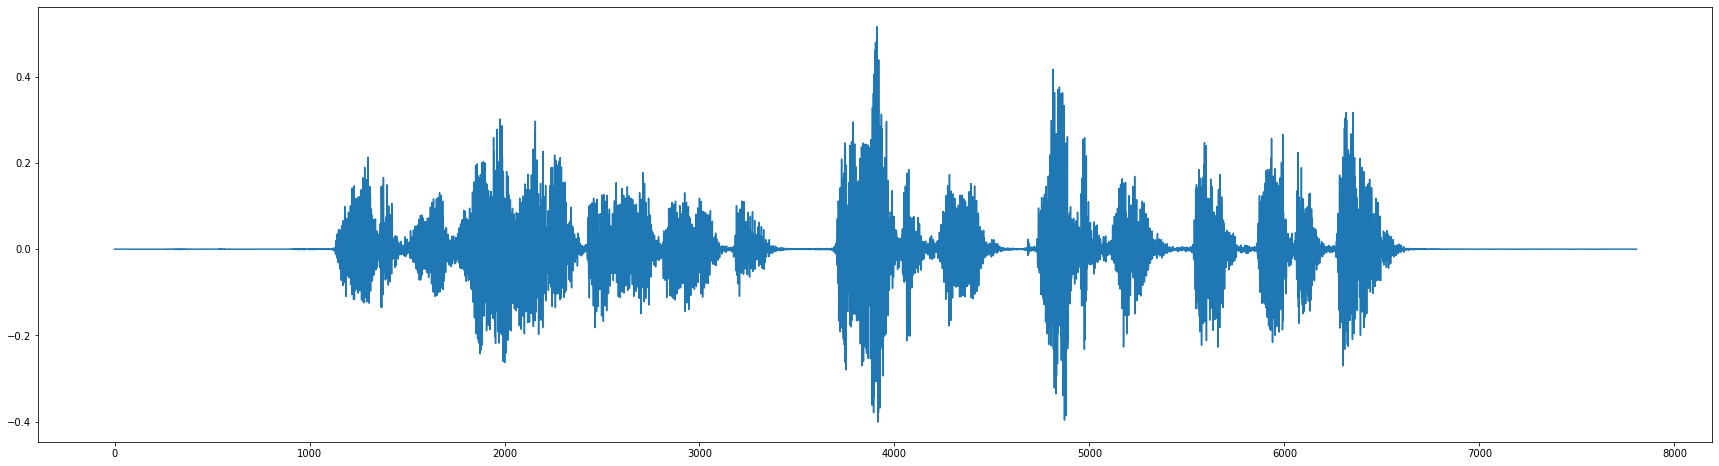

In [37]:
plt.figure(figsize=(30,8))
plt.plot(data)
plt.show()

In [38]:
cut = 0.0
newdata = [i if (i > cut) else 0 for i in abs(data)]

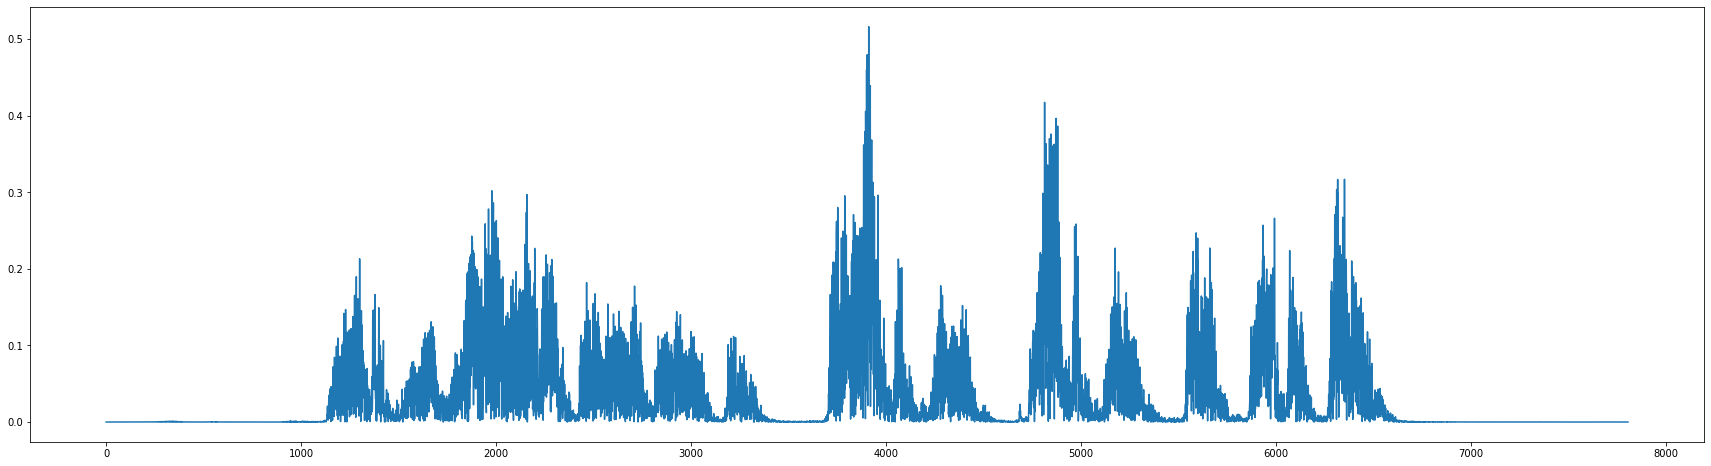

In [39]:
plt.figure(figsize=(30,8))
plt.plot(newdata)
plt.show()

In [51]:
cluster_data = []
for i in range(len(newdata)):
    if newdata[i] > 0.05:
        cluster_data.append([i,newdata[i]])
cluster_data  = np.array(cluster_data)
cluster_data

array([[1.16300000e+03, 7.20654055e-02],
       [1.16500000e+03, 5.44661097e-02],
       [1.16600000e+03, 6.15566820e-02],
       ...,
       [6.48700000e+03, 7.21804351e-02],
       [6.49100000e+03, 7.66041651e-02],
       [6.49300000e+03, 7.29244128e-02]])

In [45]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters=len(syls), 
    n_init=20,
    max_iter=6900,
    random_state=690,
    algorithm="full"
    )
label = model.fit_predict(cluster_data)

C:\Users\pitak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


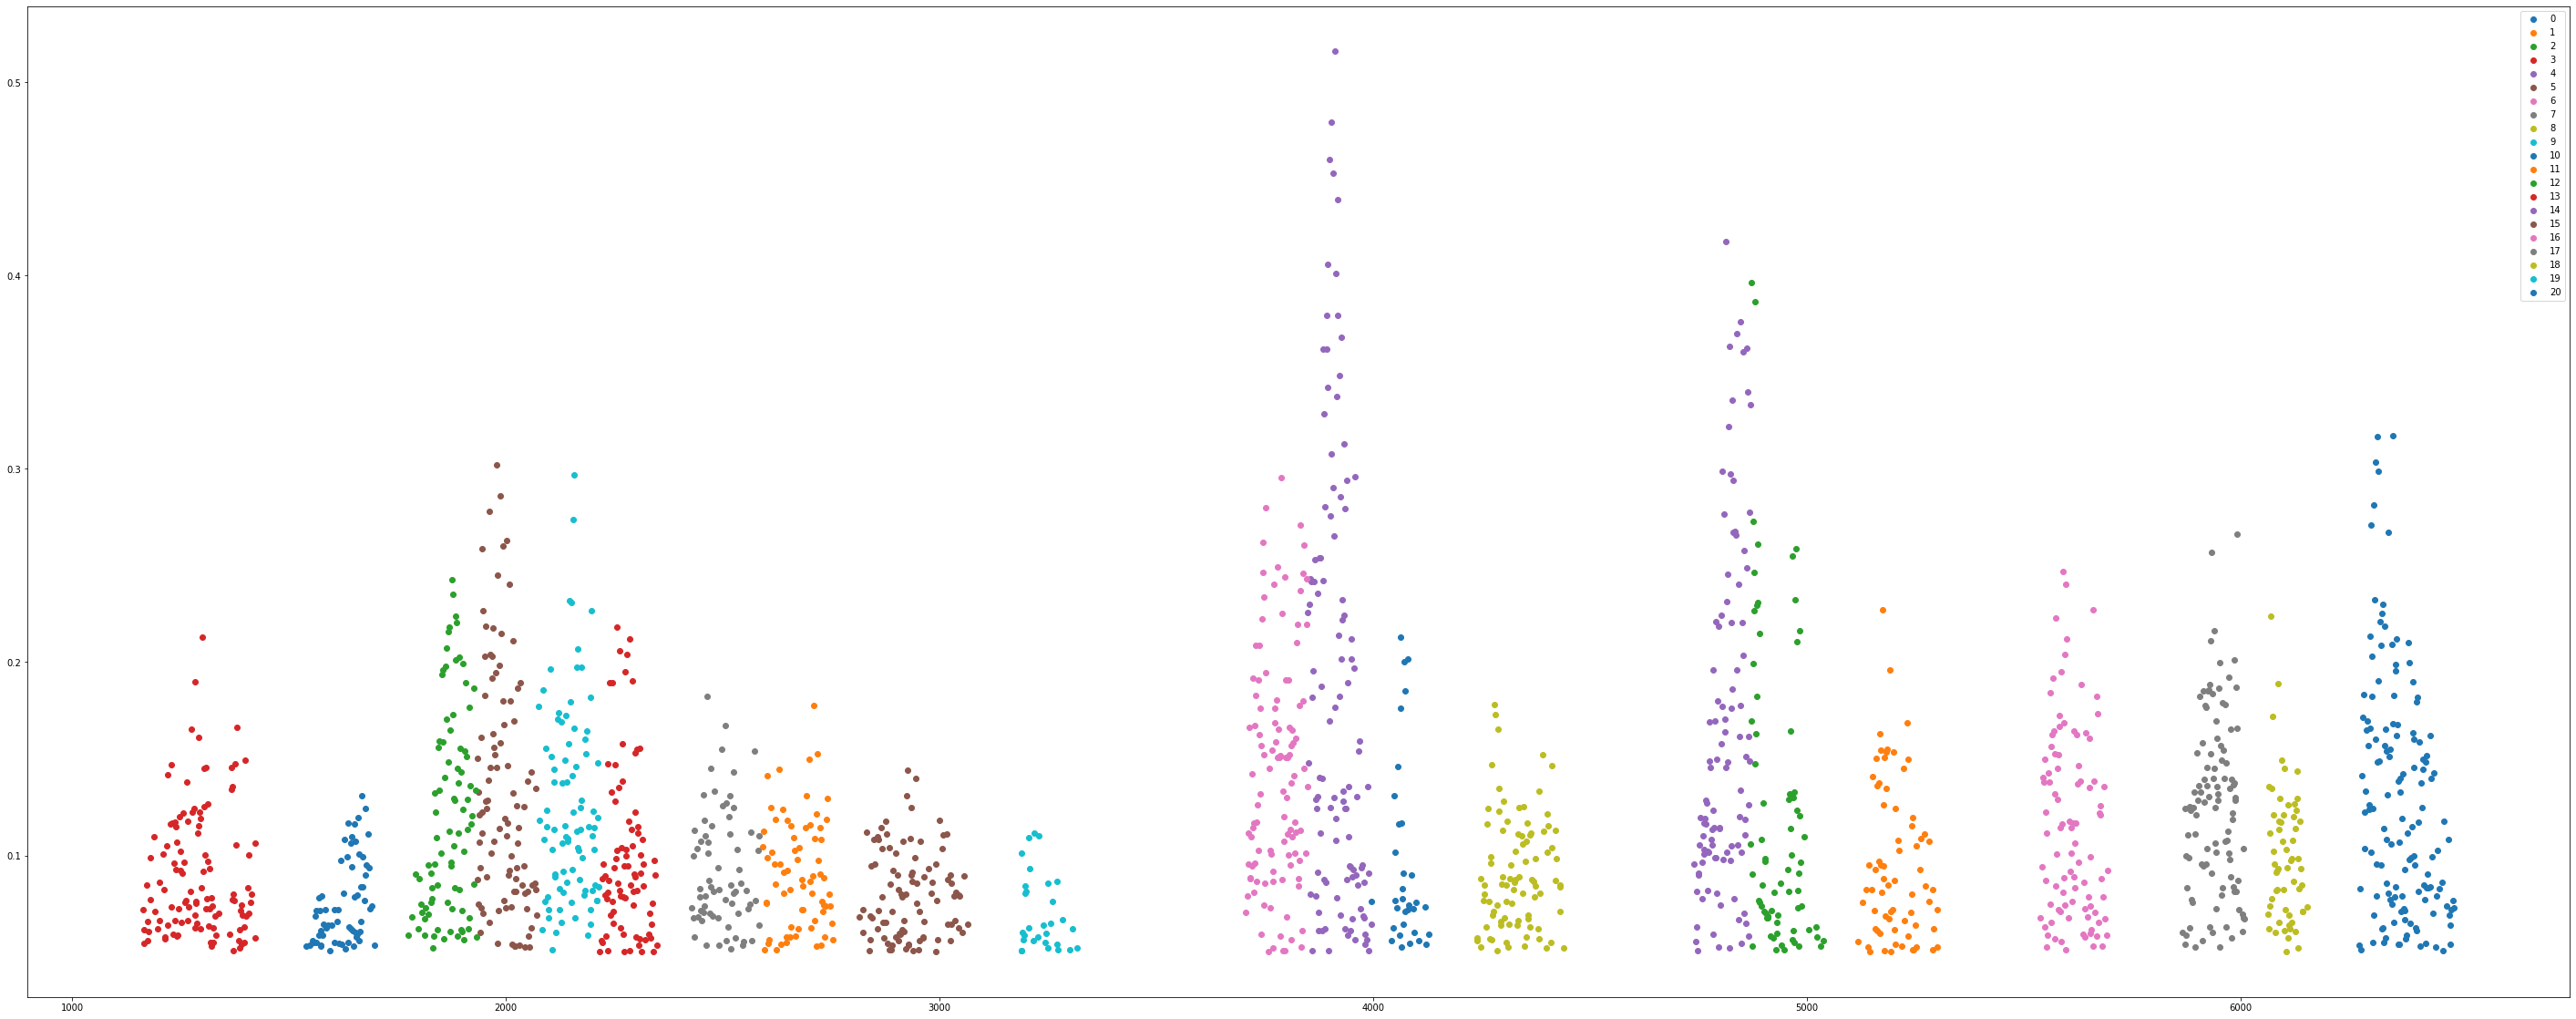

In [46]:
u_labels = np.unique(label)
plt.figure(figsize=(50,20))
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [47]:
clusters = []
for i in u_labels:
    clusters.append([int(cluster_data[label == i , 0].min()),int(cluster_data[label == i , 0].max())])
clusters = sorted(clusters)
clusters

[[1163, 1422],
 [1540, 1698],
 [1775, 1932],
 [1934, 2070],
 [2076, 2213],
 [2217, 2349],
 [2428, 2584],
 [2592, 2753],
 [2815, 3066],
 [3188, 3318],
 [3707, 3848],
 [3849, 3995],
 [3997, 4128],
 [4239, 4440],
 [4739, 4870],
 [4871, 5039],
 [5119, 5301],
 [5538, 5693],
 [5866, 6010],
 [6063, 6154],
 [6274, 6493]]

In [48]:
evaFs,evawav = wav.read(PATH)

In [50]:
c = clusters[0]
e = clusters[14]
wav.write("d.wav",evaFs,evawav[c[0]*int(evaFs/Fs):e[1]*int(evaFs/Fs)])